In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()  #Here there is no missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using seaborn print box-plot of dependent variable for outlier analysis

<Axes: ylabel='charges'>

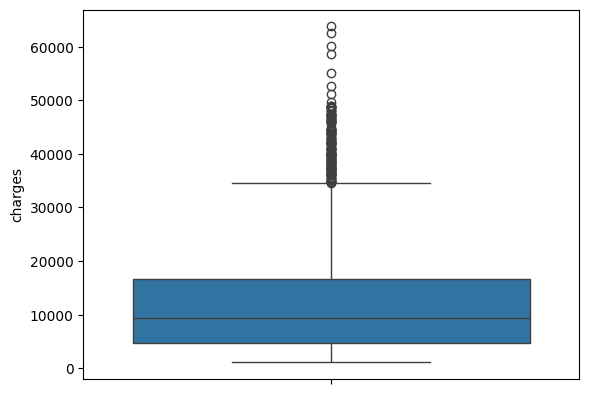

In [11]:
new_df=df.copy()
sns.boxplot(new_df['charges'])

Now we have to check whether the values change or not after appling the outlier:

In [12]:
new_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Now deal with outlier using IQR

In [13]:
#outlier treatment using IQR method

hp=sorted(new_df['charges'])
q1,q3=np.percentile(hp,[25,75])
lower_bound=q1-(1.5*(q3-q1))
upper_bound=q3+(1.5*(q3-q1))
below=new_df['charges']>lower_bound
above=new_df['charges']<upper_bound
new_df=new_df[below & above]

In [14]:
new_df.shape

(1199, 7)

In [15]:
new_df.describe()    #Here the "charges" colum max and min value is changed as per outlier treatment

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


Using seaborn print dist-plot on dependent variable

<ipython-input-16-965b27ae79fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['charges'])      #Data distribution of dependent variable


<Axes: xlabel='charges', ylabel='Density'>

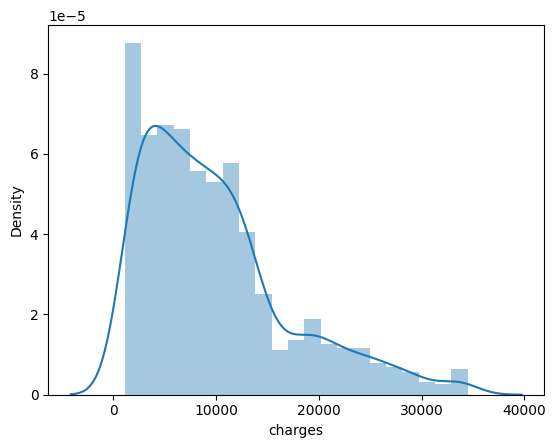

In [16]:
sns.distplot(new_df['charges'])      #Data distribution of dependent variable

Lets do a simple check of what range is currently present in the
 various variable

In [17]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1199.0,38.989992,14.068040,18.0000,26.0000,39.00000,51.0000,64.000
bmi,1199.0,30.095200,6.010551,15.9600,25.8000,29.73500,33.8200,53.130
children,1199.0,1.084237,1.214304,0.0000,0.0000,1.00000,2.0000,5.000
charges,1199.0,9927.753402,7241.158309,1121.8739,4408.6959,8410.04685,12953.5946,34472.841
